
$Ejercicio 1:$ ¿Como podemos evaluar funciones en matrices? Hint: ¿que operaciones sabemos que estan bien definidas sobre matrices?

Siendo $f(x)$ una función con serie de taylor,y $A$ siendo una matriz, tomamos su expansión en serie de Taylor: $$f(A)= \sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}A^{n}$$
Donde tenemos que: $e^{A} =  \sum_{n=0}^{\infty} \frac{A^{n}}{n!}$

$Ejercicio 2:$ ¿Como se define una matriz simétrica?


Una matriz es simétrica si es una matriz cuadrada, la cual tiene la característica de ser igual a su traspuesta ($A=A^{t}$). Una matriz de $nxm$ elementos es simétrica, si es una matriz cuadrada (m = n) y $a_{ij}=a_{ji}$ para todo i, j con i, j =1,2,3,4,...,n. 



$Ejercicio 3:$ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?


Sea A una matriz cuadrada, esta se puede descomponer en suma de parte simétrica y antisimétrica de la siguiente forma:

$$A=\dfrac{1}{2}\left(A+A^{T}\right)+\frac {1}{2}\left(A-A^{T}\right)$$

Donde la parte simétrica es

$$\frac {1}{2}\left(A+A^{T}\right)$$

Por lo tanto, sí, se puede construir una matriz simétrica a partir de cualquier matriz cuadrada.

$Ejercicio 4:$ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice: $$A=\left(\begin{array}{cc} -1  & 1\\ -1 & -1 \end{array} \right).$$

In [1]:
#definimos la matriz del ejercicio A
A=[-1 1; -1 -1] 

2×2 Array{Int64,2}:
 -1   1
 -1  -1

In [2]:
#buscamos los eigenvalores de la matriz
v=eigvals(A)     #Calculamos los eigenvalores.


2-element Array{Complex{Float64},1}:
 -1.0+1.0im
 -1.0-1.0im

In [5]:
d=diagm(v)
w=eigvecs(A) #Calculamos los eigenvectores.
expA=w*diagm(exp.(v))*w'

2×2 Array{Complex{Float64},2}:
 0.198766+0.0im   0.30956+0.0im
 -0.30956+0.0im  0.198766+0.0im

In [6]:
xpA(t) = e^(-t)*[cos(t) sin(t);-sin(t) cos(t)] #Definimos nuestra exponencial.


xpA (generic function with 1 method)

Donde $e^{\boldsymbol{A}t}=\boldsymbol{{w}}e^{\boldsymbol{{D}}t}\boldsymbol{{w}}^{-1}$ es el propagador,


donde $\boldsymbol{{D}}$ es diagonal y por tanto  $e^{\boldsymbol{{D}}t}$ es la matriz diagonal cuyas entradas son la exponencial de las entradas de $\boldsymbol{{D}}$.

Y $$e^{\boldsymbol{\mathcal{A}}t}=e^{-t}\left(\begin{array}{cc}\cos(t) & \mathrm{sen}(t)\\-\mathrm{sen}(t) & \cos(t)\end{array}\right)$$

In [8]:
using PyPlot

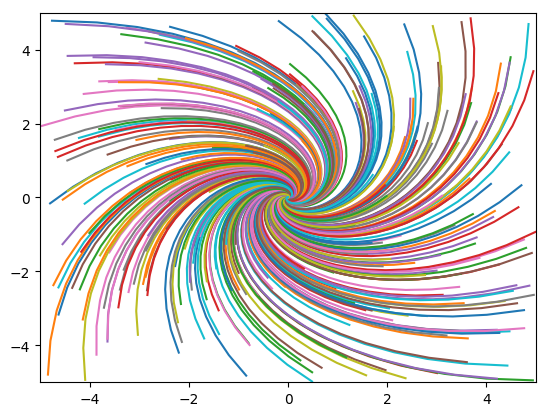

In [10]:
listt=0:0.1:300
for j in 1:300
    a=5*(2*rand(1)-1)
    b=5*(2*rand(1)-1)
    x(t)=xpA(t)*[a,b]
    x1=map(x->x[1],x.(listt))
    x2=map(x->x[2],x.(listt))
    plot(x1,x2)
    xlim(-5,5)
    ylim(-5,5)
    legend()
end